# 라이브러리 

In [3]:
from collections import namedtuple                                  #표준 라이브러리 모듈 
import warnings
warnings.filterwarnings(action='ignore')
import urllib
from urllib import parse
from urllib.request import urlopen , Request
from urllib.parse import urlencode, unquote, quote_plus
import json
from datetime import timedelta
import math
import io
import datetime as dt
import time
import sys
import glob
import csv

import numpy as np                                                  #서드 파티 모듈
import sympy as sp
from numpy import array as vector
import matplotlib as plt
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from IPython.display import Image
from IPython.display import HTML
from IPython.display import display
from IPython.display import YouTubeVideo
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from pandas import Series, DataFrame
import lxml
from datetime import datetime,timedelta
import xmltodict
import cv2
from pyproj import Proj, transform

## <코로나19 예방접종 통계 데이터 조회 서비스> 

- 21년 3월 11일 등록  
- 시도별 1,2회차 백신접종 정보  
- 공공데이터 포털  
[API](https://www.data.go.kr/iim/api/selectAPIAcountView.do)

In [4]:
headers = {
    'accept': 'application/json',
}
params = (
    ('page', (dt.datetime.now()-dt.datetime(2021,3,11)).days+1),
    ('perPage', '18'),
    ('serviceKey', '서비스키'),
)
response = requests.get('https://api.odcloud.kr/api/15077756/v1/vaccine-stat', headers=headers, params=params)
response=response.json()
df=DataFrame(response["data"])
# matchCount,page,perPage,totalCount,currentCount 생략
df

,accumulatedFirstCnt,accumulatedSecondCnt,baseDate,firstCnt,secondCnt,sido,totalFirstCnt,totalSecondCnt
0,948047,367173,2021-08-12 00:00:00,7992,5303,충청남도,956039,372476
1,861942,340804,2021-08-12 00:00:00,5412,4475,전라북도,867354,345279
2,939700,377478,2021-08-12 00:00:00,5570,5273,전라남도,945270,382751
3,1198606,453460,2021-08-12 00:00:00,11153,7131,경상북도,1209759,460591
4,1395478,515391,2021-08-12 00:00:00,13201,8450,경상남도,1408679,523841
5,281102,104874,2021-08-12 00:00:00,1907,2133,제주특별자치도,283009,107007
6,21815395,8227001,2021-08-13 00:00:00,166325,705064,전국,21981720,8932065
7,4042352,1551572,2021-08-13 00:00:00,28270,135399,서울특별시,4070622,1686971
8,962964,356251,2021-08-13 00:00:00,7891,29282,대구광역시,970855,385533
9,1506578,537715,2021-08-13 00:00:00,10354,50437,부산광역시,1516932,588152


---

#  <질병관리청 xml 파일>
##  -  코로나19 예방접종 통계데이터 개방 안내문

- 통계데이터 개방은 XML 형태의 오픈API 형태로 진행되며,코로나19 예방접종 누리집(코로나19예방접종.kr)’에서 개방되는 통계데이터와 동일합니다.
- 공개되는 통계자료는 매일 9시 30분마다, 전날 24시까지의 실적자료가 갱신됩니다.
- 통계데이터 개방 항목은 2종으로, 다음과 같습니다.

---
- (1) :시도별 당일(금일)기준 1,2 회차 접종 및 누적 접종 
- (2) :1,2회차 접종 누적, 및 당일 , 전체 실적

In [5]:
url_sido='https://nip.kdca.go.kr/irgd/cov19stats.do?list=sido'
request_sido = Request(url_sido)
request_sido.get_method = lambda: 'GET'
response_body_sido = urlopen(request_sido).read()
rD_sido = xmltodict.parse(response_body_sido)   
rDJ_sido = json.dumps(rD_sido)
rDD_sido = json.loads(rDJ_sido)
w_data_sido = rDD_sido["response"]["body"]["items"]["item"]
df_sido=DataFrame(w_data_sido)
df_sido

,sidoNm,firstCnt,firstTot,secondCnt,secondTot
0,서울특별시,28270,4070622,135399,1686971
1,부산광역시,10354,1516932,50437,588152
2,대구광역시,7891,970855,29282,385533
3,인천광역시,8221,1173873,37460,450675
4,광주광역시,3839,618214,21771,255557
5,대전광역시,4323,588518,18617,245197
6,울산광역시,4761,455804,14216,161038
7,세종특별자치시,954,124180,4321,50395
8,경기도,45431,5285820,165797,2111895
9,강원도,4469,742235,23105,328118


In [6]:
url_all='https://nip.kdca.go.kr/irgd/cov19stats.do?list=all'
request_all = Request(url_all)
request_all.get_method = lambda: 'GET'
response_body_all = urlopen(request_all).read()
rD_all = xmltodict.parse(response_body_all)   
rDJ_all = json.dumps(rD_all)
rDD_all = json.loads(rDJ_all)
w_data_all = rDD_all["response"]["body"]["items"]["item"]
df_all=DataFrame(w_data_all)
df_all

,tpcd,firstCnt,secondCnt
0,당일실적(A),166325,705064
1,전일누적(B),21815395,8227001
2,전체건수(C): (A)+(B),21981720,8932065


---

# <통계청 인구수>

- 21년 4,5,6월 성별 및 전체 시도별 인구 수 

In [7]:
ingu= pd.read_csv(r"ingu.csv",encoding = 'cp949')

In [8]:
ingu

,행정구역(시군구)별,2021. 04,2021. 04.1,2021. 04.2,2021. 05,2021. 05.1,2021. 05.2,2021. 06,2021. 06.1,2021. 06.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51702100,25784538,25917562,51683025,25775853,25907172,51672400,25770033,25902367
2,서울특별시,9588711,4661711,4927000,9575355,4654720,4920635,9565990,4649442,4916548
3,부산광역시,3369704,1650252,1719452,3367334,1648965,1718369,3364358,1647291,1717067
4,대구광역시,2406296,1186663,1219633,2402940,1184977,1217963,2397646,1182380,1215266
5,인천광역시,2936214,1470490,1465724,2936382,1470528,1465854,2936367,1470544,1465823
6,광주광역시,1444787,714834,729953,1443154,714101,729053,1442647,713793,728854
7,대전광역시,1457619,727522,730097,1457161,727279,729882,1456107,726666,729441
8,울산광역시,1128163,579853,548310,1127175,579316,547859,1126369,578924,547445
9,세종특별자치시,361396,180462,180934,362036,180778,181258,362995,181328,181667


# <누적 확진자 - 시도별 API>

In [9]:
t=time.strftime('%Y%m%d', time.localtime(time.time()))
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : '서비스키', quote_plus('pageNo') : '1', quote_plus('numOfRows') : '10', quote_plus('startCreateDt') : '20200415', quote_plus('endCreateDt') : 't' })
request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()

# xml -> dict -> json -> dict
rD = xmltodict.parse(response_body)   
rDJ = json.dumps(rD)
rDD = json.loads(rDJ)
w_data = rDD["response"]["body"]["items"]["item"]
df=DataFrame(w_data)
df.head(19)

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2021-08-13 09:43:02.987,12,5531,검역,隔離區,Lazaretto,18,5026,493,0,18,-,11504,2021년 08월 13일 00시,null
1,2021-08-13 09:43:02.987,1,1984,제주,济州,Jeju,44,1777,206,44,0,294.08,11503,2021년 08월 13일 00시,null
2,2021-08-13 09:43:02.986,23,8560,경남,庆南,Gyeongsangnam-do,125,7237,1300,122,3,256.27,11502,2021년 08월 13일 00시,null
3,2021-08-13 09:43:02.986,88,6110,경북,庆北,Gyeongsangbuk-do,82,5410,612,77,5,231.49,11501,2021년 08월 13일 00시,null
4,2021-08-13 09:43:02.985,18,2256,전남,全南,Jeollanam-do,18,2022,216,18,0,121.84,11500,2021년 08월 13일 00시,null
5,2021-08-13 09:43:02.985,60,3070,전북,全北,Jeollabuk-do,27,2714,296,25,2,170.17,11499,2021년 08월 13일 00시,null
6,2021-08-13 09:43:02.985,46,5777,충남,忠南,Chungcheongnam-do,72,4852,879,68,4,272.37,11498,2021년 08월 13일 00시,null
7,2021-08-13 09:43:02.985,71,4430,충북,忠北,Chungcheongbuk-do,52,3824,535,50,2,276.73,11497,2021년 08월 13일 00시,null
8,2021-08-13 09:43:02.984,57,4864,강원,江原,Gangwon-do,33,4441,366,33,0,315.26,11496,2021년 08월 13일 00시,null
9,2021-08-13 09:43:02.983,700,61904,경기,京畿,Gyeonggi-do,540,53907,7297,527,13,461.04,11495,2021년 08월 13일 00시,null


# <경기 데이터 드림 - 유동 인구>

- 시 군 별 월 단위 일일 평균 유동인구 데이터, 연령대 별 유동인구 수 정보 제공
- 유동인구의 단위는 (명)이며, 계산에 시장점유율이 반영되어 소수점 단위로 표시됨.  
- 경기데이터 드림  
[API](https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&rows=10&sortColumn=&sortDirection=&infId=6NOSUTB9NJAKABX5DFCJ31197470&infSeq=1&order=&loc=&searchWord=%EC%9C%A0%EB%8F%99)

---

- (1) API
- (2) CSV

In [10]:
url_udong='https://openapi.gg.go.kr/IPGDST?KEY=36cb4e0914d14dbdb860831a3bacbf9d&pIndex=1&pSize=50'
request_udong = Request(url_udong)
request_udong.get_method = lambda: 'GET'
response_body_udong = urlopen(request_udong).read()
rD_udong = xmltodict.parse(response_body_udong)   
rDJ_udong = json.dumps(rD_udong)
rDD_udong = json.loads(rDJ_udong)
dff_udong=DataFrame(rDD_udong["IPGDST"]["row"])
dff_udong

,YM,BGPT_CD,ARVL_DOT_CD,TYPAGE10_MALE_TOTSUM,TYPAGE20_MALE_TOTSUM,TYPAGE30_MALE_TOTSUM,TYPAGE40_MALE_TOTSUM,TYPAGE50_MALE_TOTSUM,TYPAGE60_MALE_TOTSUM,TYPAGE70_MALE_TOTSUM,TYPAGE10_FEMALE_TOTSUM,TYPAGE20_FEMALE_TOTSUM,TYPAGE30_FEMALE_TOTSUM,TYPAGE40_FEMALE_TOTSUM,TYPAGE50_FEMALE_TOTSUM,TYPAGE60_FEMALE_TOTSUM,TYPAGE70_FEMALE_TOTSUM
0,202001,11170,41590,19.15,64.28,116.56,136.39,118.72,45.84,13.68,23.83,52.79,67.96,51.08,33.53,26.28,16.03
1,202001,11170,41610,39.55,39.38,48.18,63.35,59.68,29.78,11.6,29.66,30.79,44.08,36.09,25.58,16.77,9.27
2,202001,11170,41630,30.51,21.78,29.73,38.39,37.38,21.49,7.53,21.1,12.57,21.77,24.48,25.13,17.43,11.46
3,202001,11170,41650,29.74,17.65,26.94,35.66,32.29,21.6,12.11,31,20.25,19.12,27.59,23.03,15.15,7.43
4,202001,11170,41670,9.37,8.9,21.12,17.89,22,10.84,2.6,14.36,16.7,21.71,15.95,11.51,8.15,4.5
5,202001,11170,41800,3.53,6.28,3.78,8.9,5.84,3.41,0.86,1.93,2.77,3.98,5.18,6.69,1.96,2.23
6,202001,11170,41820,19.67,23.43,28.61,23.67,18.9,17,6.32,34.87,29.17,27.17,22.76,19.15,13.55,9.04
7,202001,11170,41830,24.13,21.34,28.54,46.03,35.48,34.52,19.25,26.35,25.54,29.88,31.52,38.88,25.54,16.67
8,202001,11200,41110,43.14,154.78,232.8,191.1,126.1,46.26,14.88,40.65,114.35,113.62,79.49,57.93,38.22,19.22
9,202001,11200,41130,78.28,337.16,670.5,617.02,392.37,154.76,64.15,77.39,317.83,372.37,284.04,200.57,146.7,67.85


## < CSV 파일 >

In [11]:
udong_ingu= pd.read_csv(r"udong_ingu.csv",encoding = 'cp949')

In [12]:
udong_ingu.head(5)

,년월,출발지(야간체류지) 시군코드,도착지 시군코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구
0,202001,11170,41590,19.15,64.28,116.56,136.39,118.72,45.84,13.68,23.83,52.79,67.96,51.08,33.53,26.28,16.03
1,202001,11170,41610,39.55,39.38,48.18,63.35,59.68,29.78,11.60,29.66,30.79,44.08,36.09,25.58,16.77,9.27
2,202001,11170,41630,30.51,21.78,29.73,38.39,37.38,21.49,7.53,21.10,12.57,21.77,24.48,25.13,17.43,11.46
3,202001,11170,41650,29.74,17.65,26.94,35.66,32.29,21.60,12.11,31.00,20.25,19.12,27.59,23.03,15.15,7.43
4,202001,11170,41670,9.37,8.90,21.12,17.89,22.00,10.84,2.60,14.36,16.70,21.71,15.95,11.51,8.15,4.50


###  데이터 조작 결과 : 의미 없는데이터, 경기도로 도착하는데이터만있음

---

# <SIR 지역별>

## - 매주 발행하는 TF보고서

- [NIMS](https://www.nims.re.kr/research/post/covid19_2)  
- 지역별 β , γ 값 확인 가능
- 고려하지 않은 일반적인 파라미터 : β =2 , γ=0.1  

## - 지역별 누적확진자 및 인구 수

||누적확진자|인구수|
|------|---|---|
|경기|55000|13000000|
|인천|8800|30000000|
|서울|63000|96000000|

- 확진자 기준: 7/27
- 인구수 기준: 2021.6
- steady state -> 960 / 300 -> 0.76 : 0.24 / -->  a = 1 , b=3
- 유동인구 서울:11 , 인천 : 28로 시작.

## 1. 서울 ,인천 고려한 모델

### $$ \frac{dSs}{dt} = -β Ss Is + a Ss - b Si $$
### $$ \frac{dSi}{dt} = -β Si Ii - a Ss + b Si $$

In [13]:
#매개 변수
beta=2
gamma=0.1

a=0.1
b=3 * a

sir_init=[0.69,0.01,0.0,0.29,0.01,0.0]
tspan=[0,20]

#SIR 함수
def sir(beta,gamma):
    def f(t,x):
        SS ,IS , RS, SI, II ,RI = x
        return vector([ (-beta * SS * IS - a * SS + b * SI) , (beta * SS * IS - gamma * IS - a * IS + b * II) , (gamma * IS - a * RS + b * RI), (-beta * SI * II + a * SS - b * SI) , (beta * SI * II - gamma * II + a * IS - b * II) , (gamma * II + a * RS - b * RI) ])
    return f

#sol
sol=solve_ivp(sir(beta,gamma),tspan,sir_init)

#plot(grid)
def plot_sir(sol, title="SIR Model", ax=None):         
    if ax is None:
        fig, ax = plt.subplots()
    # ".-" linespec은 t_eval이나 h 확인을 위해
    ax.plot(sol.t, sol.y.T, ".-")#label=["Susceptible", "Infected", "Recovered"])
    ax.set(
        xlabel="Time",
        ylabel="Population (normalized)",
        title=title,
    )
    #ax.legend()
    ax.grid()                                 #격자
    return ax

#plot(None grid, label)
def plot(sol,title="SIR Model"):
    plt.plot(sol.t,sol.y[0],label="SS")
    plt.plot(sol.t,sol.y[1],label="IS")
    plt.plot(sol.t,sol.y[2],label="RS")
    plt.plot(sol.t,sol.y[3],label="SI")
    plt.plot(sol.t,sol.y[4],label="II")
    plt.plot(sol.t,sol.y[5],label="RI")
    plt.legend()
    plt.show()

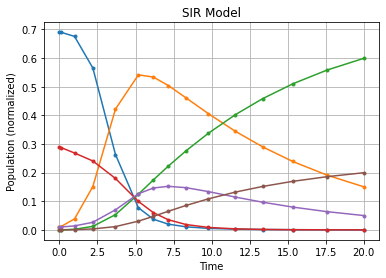

In [14]:
plot_sir(sol)

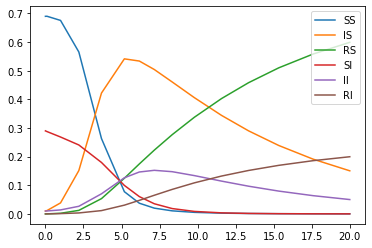

In [15]:
plot(sol)

## 2. 유동인구 파라미터 a,b 의 값의 변화에 따른 확진자의 Peak 
- 인천의 확진자수는 돌릴수록 계속증가, 파라미터 a도 마찬가지로 최대치에 근사함.

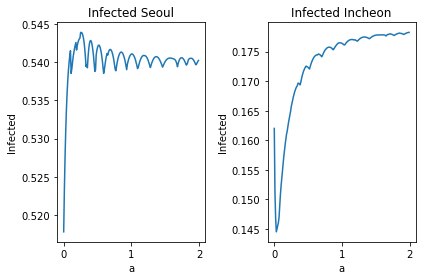

서울시 확진자의 최대치는 5221366 명 이며, 최대가 되는 유동인구 파라미터 a는 0.26 입니다.
인천시 확진자의 최대치는 516948 명 이며, 최대가 되는 유동인구 파라미터 a는 1.99 입니다.


In [16]:
max_is=[]
max_ii=[]
k=[]

for i in range(0,200):
    a=i/100
    b=3*i/100
    sol=solve_ivp(sir(beta,gamma),tspan,sir_init)
    max_is.append(max(sol.y[1]))
    max_ii.append(max(sol.y[4]))
    k.append(i/100)
    
plt.subplot(1,2,1)
plt.plot(k,max_is,label="IS")
plt.title("Infected Seoul")
plt.xlabel("a")
plt.ylabel("Infected")

plt.subplot(1,2,2)
plt.plot(k,max_ii,label="II")
plt.title("Infected Incheon")
plt.xlabel("a")
plt.ylabel("Infected")

plt.tight_layout()
plt.show()

print("서울시 확진자의 최대치는",round(max(max_is)*9600000),"명 이며, 최대가 되는 유동인구 파라미터 a는",1/100*np.argmax(max_is),"입니다.")
print("인천시 확진자의 최대치는",round(max(max_ii)*2900000),"명 이며, 최대가 되는 유동인구 파라미터 a는",1/100*np.argmax(max_ii),"입니다.")

## 3. 전국의 베타,감마값과 인구수 대비 확진자 고려하여 초기값을 준 모델 

- 감마,베타 값에 맞는 초기값(7/23 기준)
- DEF_CNT : 누적 확진자
- ISOL_CLEAR_CNT : 격리 해제 수
- DEATH_CNT : 사망자
- 서울 I(DEF_CNT) : 60000 , R(ISOL_CLEAR_CNT+DEATH_CNT) : 50000
- 인천 I(DEF_CNT) : 8000 ,  R(ISOL_CLEAR_CNT+DEATH_CNT) : 7000

In [17]:
t=time.strftime('%Y%m%d', time.localtime(time.time()))
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : '서비스키', quote_plus('pageNo') : '1', quote_plus('numOfRows') : '10', quote_plus('startCreateDt') : '20200415', quote_plus('endCreateDt') : 't' })
request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()

# xml -> dict -> json -> dict
rD = xmltodict.parse(response_body)   
rDJ = json.dumps(rD)
rDD = json.loads(rDJ)
w_data = rDD["response"]["body"]["items"]["item"]
df=DataFrame(w_data)
df.head(19)

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2021-08-13 09:43:02.987,12,5531,검역,隔離區,Lazaretto,18,5026,493,0,18,-,11504,2021년 08월 13일 00시,null
1,2021-08-13 09:43:02.987,1,1984,제주,济州,Jeju,44,1777,206,44,0,294.08,11503,2021년 08월 13일 00시,null
2,2021-08-13 09:43:02.986,23,8560,경남,庆南,Gyeongsangnam-do,125,7237,1300,122,3,256.27,11502,2021년 08월 13일 00시,null
3,2021-08-13 09:43:02.986,88,6110,경북,庆北,Gyeongsangbuk-do,82,5410,612,77,5,231.49,11501,2021년 08월 13일 00시,null
4,2021-08-13 09:43:02.985,18,2256,전남,全南,Jeollanam-do,18,2022,216,18,0,121.84,11500,2021년 08월 13일 00시,null
5,2021-08-13 09:43:02.985,60,3070,전북,全北,Jeollabuk-do,27,2714,296,25,2,170.17,11499,2021년 08월 13일 00시,null
6,2021-08-13 09:43:02.985,46,5777,충남,忠南,Chungcheongnam-do,72,4852,879,68,4,272.37,11498,2021년 08월 13일 00시,null
7,2021-08-13 09:43:02.985,71,4430,충북,忠北,Chungcheongbuk-do,52,3824,535,50,2,276.73,11497,2021년 08월 13일 00시,null
8,2021-08-13 09:43:02.984,57,4864,강원,江原,Gangwon-do,33,4441,366,33,0,315.26,11496,2021년 08월 13일 00시,null
9,2021-08-13 09:43:02.983,700,61904,경기,京畿,Gyeonggi-do,540,53907,7297,527,13,461.04,11495,2021년 08월 13일 00시,null


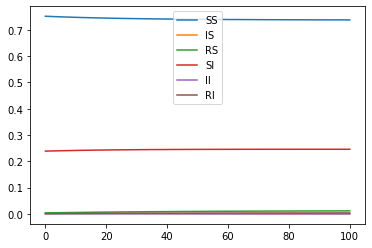

In [18]:
beta_seoul=0.047
gamma_seoul=0.047
beta_incheon=0.4522
gamma_incheon=0.366

sir_init=[0.752,0.004,0.004,0.2389,0.0006,0.0005]
tspan=[0,100]

a=0.01
b=3 * a

def sir_diff(beta_s,gamma_s,beta_i,gamma_i):
    def f(t,x):
        SS ,IS , RS, SI, II ,RI = x
        return vector([ (-beta_s * SS * IS - a * SS + b * SI) , (beta_s * SS * IS - gamma_s * IS - a * IS + b * II) , (gamma_s * IS - a * RS + b * RI), (-beta_i * SI * II + a * SS - b * SI) , (beta_i * SI * II - gamma_i * II + a * IS - b * II) , (gamma_i * II + a * RS - b * RI) ])
    return f

sol_diff=solve_ivp(sir_diff(beta_seoul,gamma_seoul,beta_incheon,gamma_incheon),tspan,sir_init)

plot(sol_diff)

---
## 4. 17개 시도별 SIR모델 (행렬)

### 3 X 3 

In [19]:
# 인구수 행렬
A=np.array([[0,39,39],[130,0,130],[30,30,0]])
coef_matrix=np.array([[-78,130,30],[39,-260,30],[39,130,-60]])

In [20]:
#서울,인천,경기 SIR모델
def sir_matrix(beta,gamma):
    def f(t,x):
        SS, SI , SG ,IS ,II ,IG ,RS, RI ,RG =x
        return np.array([[-beta * np.array([SS*IS,SI*II,SG*IG])+ coef_matrix @ np.array([SS,SI,SG])],
                                [beta * np.array ([SS*IS,SI*II,SG*IG]) - gamma *  np.array([IS,II,IG]) +coef_matrix @ np.array([IS,II,IG])],
                                [gamma * np.array([IS,II,IG])+coef_matrix @ np.array([RS,RI,RG])]]).flatten()
    return f

#파라미터
beta=2
gamma=0.1
sir_init=[0.37,0.2,0.4,0.01,0.01,0.01,0.0,0.0,0.0]
tspan=[0,100]

#솔루션
sol=solve_ivp(sir_matrix(beta,gamma),tspan,sir_init)

#plot(label)
def plot(sol,title="SIR Model"):
    plt.plot(sol.t,sol.y[0],label="SS")
    plt.plot(sol.t,sol.y[1],label="SI")
    plt.plot(sol.t,sol.y[2],label="SG")
    plt.plot(sol.t,sol.y[3],label="IS")
    plt.plot(sol.t,sol.y[4],label="II")
    plt.plot(sol.t,sol.y[5],label="IG")
    plt.plot(sol.t,sol.y[6],label="RS")
    plt.plot(sol.t,sol.y[7],label="RI")
    plt.plot(sol.t,sol.y[8],label="RG")
    plt.legend()
    plt.show()

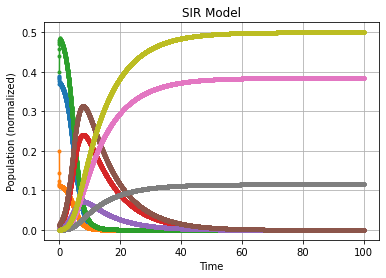

In [21]:
plot_sir(sol)

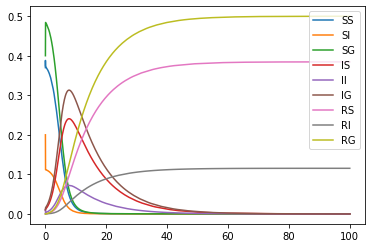

In [22]:
plot(sol)

# 17 X 17

#### 인구수 CSV파일

In [23]:
ingu= pd.read_csv(r"ingu.csv",encoding = 'cp949')
ingu.head()
pop=ingu.loc[:,["행정구역(시군구)별","2021. 06"]]
pop.head()

,행정구역(시군구)별,2021. 06
0,행정구역(시군구)별,총인구수 (명)
1,전국,51672400
2,서울특별시,9565990
3,부산광역시,3364358
4,대구광역시,2397646


#### csv파일 기준 인구비율

In [24]:
pop_ratio=pd.DataFrame({"sido":["서울","부산","대구","인천","광주","대전","울산","세종","경기","강원","충북","충남","전북","전남","경북","경남","제주"],
                       "pop":[957,336,234,294,144,146,113,36.3,1350,154,160,212,179,184,263,333,67.5]})
pop_ratio["inverse"]=pop_ratio["pop"].apply(lambda x:1/x)
pop_ratio["ratio"]=pop_ratio["pop"].apply(lambda x:x/sum(pop_ratio["pop"]))
pop_ratio.head()

,sido,pop,inverse,ratio
0,서울,957.0,0.001045,0.185365
1,부산,336.0,0.002976,0.065081
2,대구,234.0,0.004274,0.045324
3,인천,294.0,0.003401,0.056946
4,광주,144.0,0.006944,0.027892


#### 인구비율 pop_matrix , 계수비율 coef_matrix

In [25]:
# 인구 비율 행렬
pop_matrix=np.zeros(shape=(17,17))

for i in range(len(pop_matrix)):
    for j in range(len(pop_matrix)):
        pop_matrix[i][j]=pop_ratio["inverse"][i]
for i in range(len(pop_matrix)):
        pop_matrix[i][i]=0  
        
#계수 행렬
coef_matrix=pop_matrix

for i in range(len(coef_matrix)):
     coef_matrix[i][i]=-sum(coef_matrix[i])
        
coef_matrix=np.transpose(coef_matrix)
coef_matrix

array([[-0.01671891,  0.00297619,  0.0042735 ,  0.00340136,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  ,  0.01481481],
       [ 0.00104493, -0.04761905,  0.0042735 ,  0.00340136,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  ,  0.01481481],
       [ 0.00104493,  0.00297619, -0.06837607,  0.00340136,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  ,  0.01481481],
       [ 0.00104493,  0.00297619,  0.0042735 , -0.05442177,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  

#### 시도별 plot

In [26]:
is_gyeomyeok=df["gubun"]!="검역"
is_total=df["gubun"]!="합계" 
df=df[is_gyeomyeok&is_total]
df=df[:17][:]
df=pd.concat([df["defCnt"],df["gubun"]],axis=1)
df=df.rename(columns={"gubun":"sido"})
pop_ratio=pd.merge(df,pop_ratio,on="sido",how="outer")
pop_ratio["defCnt"]=pop_ratio["defCnt"].astype(int)
pop_ratio["defCnt_ratio"]=pop_ratio["defCnt"].apply(lambda x:x/sum(pop_ratio["defCnt"]))
pop_ratio["ratio_26"]=pop_ratio["ratio"].apply(lambda x:x*26)
pop_ratio.head()

,defCnt,sido,pop,inverse,ratio,defCnt_ratio,ratio_26
0,1984,제주,67.5,0.014815,0.013074,0.009243,0.339932
1,8560,경남,333.0,0.003003,0.064500,0.039879,1.676997
2,6110,경북,263.0,0.003802,0.050941,0.028465,1.324475
3,2256,전남,184.0,0.005435,0.035640,0.010510,0.926629
4,3070,전북,179.0,0.005587,0.034671,0.014302,0.901449


#### 초기값 기준 :
- 총합 1
- 인구수 :5200 만 , 확진자 : 20만 -> 26:1
- R : 0

In [27]:
#매개변수
beta=2
gamma=0.1
tspan=[0,100]

sir_init_s=pop_ratio["ratio_26"].tolist() 
sir_init_i=pop_ratio["defCnt_ratio"].tolist()
sir_init_r=[0] * 17
sir_init=sir_init_s + sir_init_i + sir_init_r
sir_init=list(map(lambda x: x/sum(sir_init),sir_init))

#시도별 SIR모델
def sir_sido(beta,gamma):
    def f(t,x):
        S , I , R = x.reshape(3,17)
        return vector([(-beta * S * I + coef_matrix @ S) , (beta * S * I - gamma * I + coef_matrix @ I) , (gamma * I + coef_matrix @ R)]).flatten()
    return f

#sol
sol=solve_ivp(sir_sido(beta,gamma),tspan,sir_init)

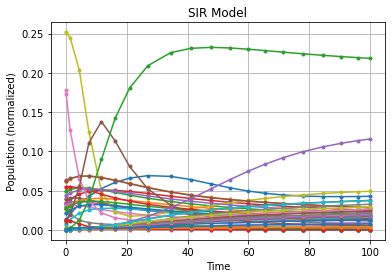

In [28]:
plot_sir(sol)

pass 